<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_excel("/content/Load Data in kW.xlsx",header = None)
data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [5]:
data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7ff1e6360310>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff1e6364990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1e62e9650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1e6364510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff1e63603d0>,
  <matplotlib.lines.Line2D at 0x7ff1e6360990>]}

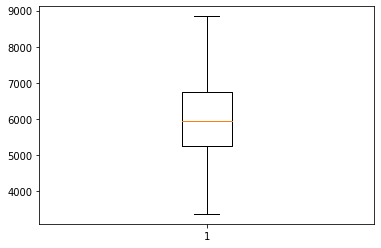

In [27]:
plt.boxplot(data.iloc[:,0])

In [28]:
z = np.abs(stats.zscore(data.iloc[:,0]))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


{'boxes': [<matplotlib.lines.Line2D at 0x7ff1e5a30890>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff1e5a34950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1e5a3b990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1e5a3b450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff1e5a30e90>,
  <matplotlib.lines.Line2D at 0x7ff1e5a34410>]}

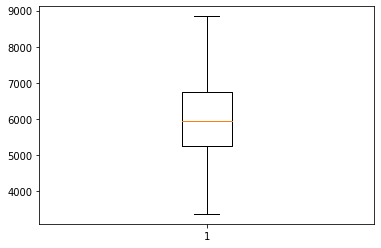

In [29]:
data.iloc[929,0] =data.iloc[928,0]
plt.boxplot(data.iloc[:,0])

In [30]:
data_1 = minmax_scale(data.iloc[:,0])
print(data_1)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


In [31]:
x = []
y = []
for i in range(1,len(data_1)-24):
  temp = [data_1[i],data_1[i+23]]
  x.append(temp)
  y.append(data_1[i+24])
x = np.array(x)
y = np.array(y)

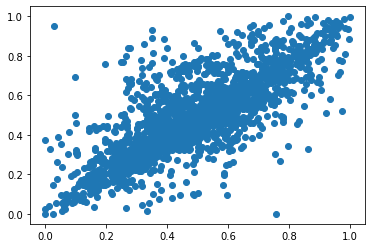

In [32]:
plt.scatter(x[:,[1]],y)

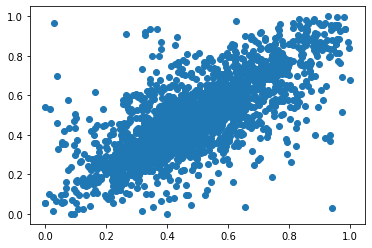

In [33]:
plt.scatter(x[:,[0]],y)

In [34]:
print(x)
print(y)

[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


In [35]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

0.2764543094348234
0.25579869333257255
0.24450087016062294


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [40]:
def gradient_m0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0
def gradient_m1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1
def gradient_c(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)
def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

In [49]:
m0 = 1
m1 = 1
c = 1
learning_rate = 0.01
epochs = 1000
Gm0 = 0
Gm1 = 0
Gc = 0
gama = 0.9
e = pow(10,-8)
number_of_samples = len(x_train)
error_list = []

In [50]:
for i in range(epochs):
    for j in range(number_of_samples):
        gradient_of_m0 = gradient_m0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_of_m1 = gradient_m1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_of_c = gradient_c(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = gama*Gm0 + (1-gama)*gradient_of_m0**2
        Gm1 = gama*Gm1 + (1-gama)*gradient_of_m1**2
        Gc = gama*Gc + (1-gama)*gradient_of_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        delta_m0 = -1*learning_rate_m0*gradient_of_m0
        delta_m1 = -1*learning_rate_m1*gradient_of_m1
        delta_c = -1*learning_rate_c*gradient_of_c
        
        m0 = m0 + delta_m0
        m1 = m1 + delta_m1
        c = c + delta_c
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.011243213017873309
0.009932912490584925
0.009766106035855425
0.010192085206514817
0.01051099325225003
0.010795046392101089
0.010823984527527898
0.010941509848332602
0.011021665683454536
0.010866497060071001
0.010807358116360952
0.010958217420881272
0.010654785168220682
0.010628303576191302
0.010851559201933187
0.010673281171726882
0.010387947179657714
0.010330471710139386
0.010657487682547156
0.01070627663665007
0.010599549498840462
0.01055959404180218
0.011816635175483673
0.011037909480499384
0.010975444235206393
0.011038070042377527
0.011056683550188132
0.01132392372767913
0.010889807934567711
0.010960640433147852
0.01106287066883321
0.011179135659951852
0.010994898036684093
0.011196580328214146
0.010930927424381705
0.01117486911119553
0.011959052762940023
0.011125084269350778
0.010864340714784862
0.011304503918325937
0.01119913863704844
0.011807403444554826
0.011066439628654926
0.010750680038293416
0.0108359955342698
0.012917534007319561
0.010797518645872283
0.011398062020996825
0

Text(0.5, 1.0, 'error graph')

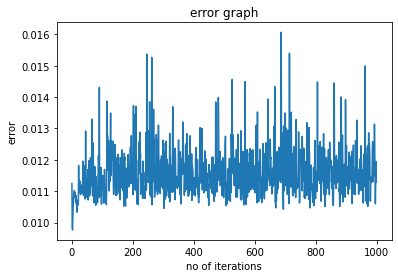

In [51]:
x_1 = range(epochs)
y_1 = error_list
plt.plot(x_1,y_1)
plt.xlabel("no of iterations")
plt.ylabel("error")
plt.title("error graph")

In [52]:
print(m0,m1,c)

0.8020399765627568 -0.07057220573812653 0.06800086975032718


In [53]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)
print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.011228684930902582
test error :  0.011561769748600032


In [55]:
load0 = float(input("enter yesterday load : "))
load1 = float(input("enter load at previous hour : "))
max_value = 8841.669480
min_value = 3377.919600
load0 = (load0 - min_value)/(max_value-min_value)
load1 = (load1 - min_value)/(max_value-min_value)
load = load0*m0 + load1*m0 + c
load = load*(max_value-min_value)+min_value
print("predicted load in this hour is : ",load)

enter yesterday load : 4444.4
enter load at previous hour : 2345.6
predicted load in this hour is :  3776.8576711696105
